In [31]:
import numpy as np
import pandas as pd
import os, sys  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools as it
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback

In [2]:
route = os.getcwd()
new_route = os.path.dirname(route)
sys.path.append(route)

In [197]:
from utils.mining_data_tb import merge_csv
from utils.mining_data_tb import save_merged_csv
from utils.mining_data_tb import add_features
from utils.models import build_simple_rnn
from utils.models import LSTM_preprocessing

In [4]:
columns = ['Date', 'Time','Bar OPEN Bid Quote','Bar HIGH Bid Quote','Bar LOW Bid Quote','Bar CLOSE Bid Quote','Volume']
base = '../data/DAT_MT_EURUSD_M1_20'
test_path = r'C:\\Users\\jarai\\Desktop\\Python_work\\TheBridge\\Alumno\\Javier_Araiz_TheBridge\\ML_Project\\data'
first_file = 'merged_file1'

In [5]:
merge_csv(base, start_number= 15, range_number= (1, 5), column_name= columns, path= test_path, file_name= first_file )

In [6]:
base2 = '../data/DAT_MT_EURUSD_M1_20210'
second_file = 'merged_file2'

In [7]:
merge_csv(base2, start_number= 0, range_number= (1, 5), column_name= columns, file_name= second_file, path= test_path )

In [8]:
base3 ='../data/merged_file'
final_name = 'all_joined_forex'

In [9]:
csv_one = '../data/merged_file1.csv'
csv_two = '../data/merged_file2.csv'
name_of_final = 'all_together_forex'

In [10]:
save_merged_csv(csv_one, csv_two,file_name= name_of_final, path= test_path)

In [11]:
df = pd.read_csv('../data/all_together_forex.csv')
df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume
0,2016.01.03,17:00,1.08701,1.08713,1.08701,1.08713,0
1,2016.01.03,17:01,1.08712,1.08712,1.08712,1.08712,0
2,2016.01.03,17:02,1.08708,1.08722,1.08708,1.08722,0
3,2016.01.03,17:03,1.08717,1.08723,1.08717,1.08723,0
4,2016.01.03,17:04,1.08718,1.08718,1.08711,1.08711,0
...,...,...,...,...,...,...,...
2013228,2021.05.31,19:53,1.22332,1.22332,1.22329,1.22330,0
2013229,2021.05.31,19:54,1.22330,1.22330,1.22329,1.22329,0
2013230,2021.05.31,19:55,1.22327,1.22331,1.22326,1.22330,0
2013231,2021.05.31,19:57,1.22329,1.22329,1.22329,1.22329,0


In [12]:
featured_file_name = 'featured_df'

add_features(df= df, file_name= featured_file_name, path= test_path)

In [13]:
final_df = pd.read_csv('../data/featured_df.csv')
final_df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,SMA_5,SMA_20,SMA_200,EMA_20
0,2016.01.03,17:00,1.08701,1.08713,1.08701,1.08713,0,NaN,NaN,NaN,NaN
1,2016.01.03,17:01,1.08712,1.08712,1.08712,1.08712,0,NaN,NaN,NaN,NaN
2,2016.01.03,17:02,1.08708,1.08722,1.08708,1.08722,0,NaN,NaN,NaN,NaN
3,2016.01.03,17:03,1.08717,1.08723,1.08717,1.08723,0,NaN,NaN,NaN,NaN
4,2016.01.03,17:04,1.08718,1.08718,1.08711,1.08711,0,1.087162,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2013228,2021.05.31,19:53,1.22332,1.22332,1.22329,1.22330,0,1.223316,1.223283,1.222834,1.223276
2013229,2021.05.31,19:54,1.22330,1.22330,1.22329,1.22329,0,1.223316,1.223291,1.222838,1.223277
2013230,2021.05.31,19:55,1.22327,1.22331,1.22326,1.22330,0,1.223308,1.223304,1.222841,1.223279
2013231,2021.05.31,19:57,1.22329,1.22329,1.22329,1.22329,0,1.223302,1.223315,1.222844,1.223280


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013233 entries, 0 to 2013232
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Date                 object 
 1   Time                 object 
 2   Bar OPEN Bid Quote   float64
 3   Bar HIGH Bid Quote   float64
 4   Bar LOW Bid Quote    float64
 5   Bar CLOSE Bid Quote  float64
 6   Volume               int64  
 7   SMA_5                float64
 8   SMA_20               float64
 9   SMA_200              float64
 10  EMA_20               float64
dtypes: float64(8), int64(1), object(2)
memory usage: 169.0+ MB


In [17]:
df.isnull().sum()

Date                     0
Time                     0
Bar OPEN Bid Quote       0
Bar HIGH Bid Quote       0
Bar LOW Bid Quote        0
Bar CLOSE Bid Quote      0
Volume                   0
SMA_5                    4
SMA_20                  19
SMA_200                199
EMA_20                  19
dtype: int64

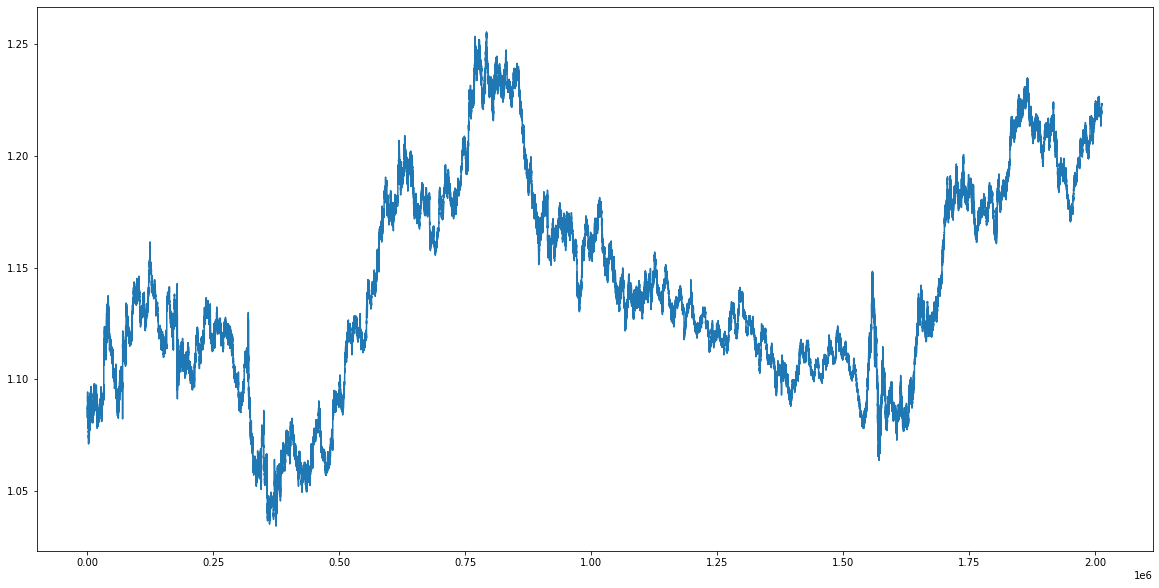

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(df['Bar CLOSE Bid Quote'])

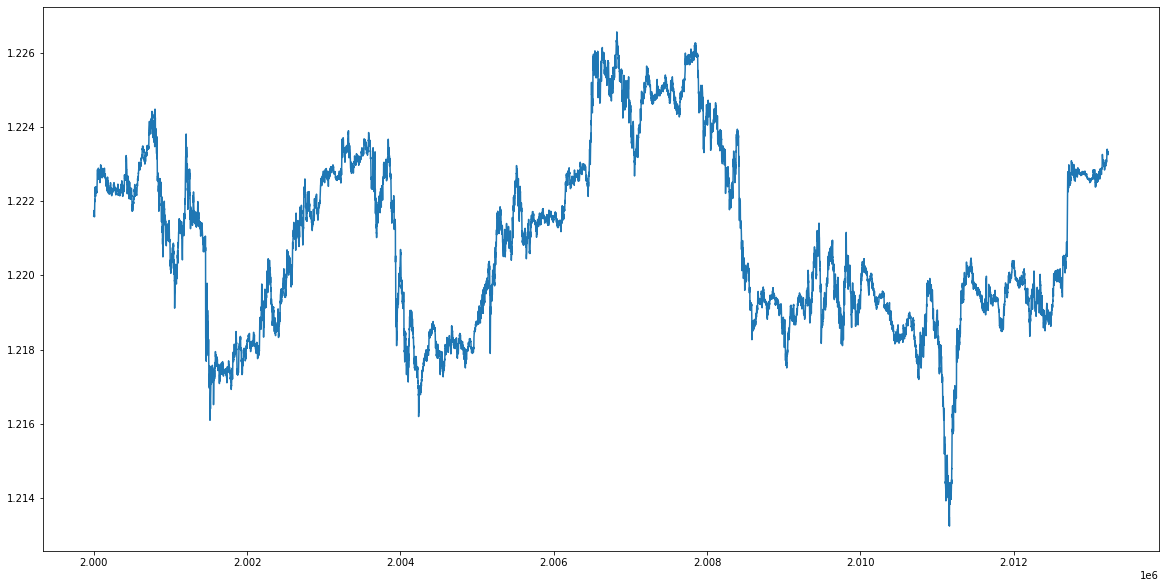

In [28]:
plt.figure(figsize=(20, 10))
plt.plot(df['Bar CLOSE Bid Quote'][2000000:])

In [29]:
test_df = df.iloc[2000000:,:]

In [30]:
test_df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,SMA_5,SMA_20,SMA_200,EMA_20
2000000,2021.05.18,13:26,1.22160,1.22162,1.22158,1.22160,0,1.221588,1.221577,1.221098,1.221588
2000001,2021.05.18,13:27,1.22159,1.22162,1.22159,1.22160,0,1.221592,1.221577,1.221101,1.221590
2000002,2021.05.18,13:28,1.22159,1.22159,1.22158,1.22159,0,1.221594,1.221577,1.221105,1.221590
2000003,2021.05.18,13:29,1.22160,1.22163,1.22159,1.22163,0,1.221602,1.221583,1.221108,1.221593
2000004,2021.05.18,13:30,1.22168,1.22173,1.22168,1.22173,0,1.221630,1.221592,1.221113,1.221606
...,...,...,...,...,...,...,...,...,...,...,...
2013228,2021.05.31,19:53,1.22332,1.22332,1.22329,1.22330,0,1.223316,1.223283,1.222834,1.223276
2013229,2021.05.31,19:54,1.22330,1.22330,1.22329,1.22329,0,1.223316,1.223291,1.222838,1.223277
2013230,2021.05.31,19:55,1.22327,1.22331,1.22326,1.22330,0,1.223308,1.223304,1.222841,1.223279
2013231,2021.05.31,19:57,1.22329,1.22329,1.22329,1.22329,0,1.223302,1.223315,1.222844,1.223280


In [36]:
test_df['Close Price'] = test_df['Bar OPEN Bid Quote']
test_df = test_df.drop(columns='Bar OPEN Bid Quote', axis= 1)
test_df

,Date,Time,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,SMA_5,SMA_20,SMA_200,EMA_20,Close Price
2000000,2021.05.18,13:26,1.22162,1.22158,1.22160,0,1.221588,1.221577,1.221098,1.221588,1.22160
2000001,2021.05.18,13:27,1.22162,1.22159,1.22160,0,1.221592,1.221577,1.221101,1.221590,1.22159
2000002,2021.05.18,13:28,1.22159,1.22158,1.22159,0,1.221594,1.221577,1.221105,1.221590,1.22159
2000003,2021.05.18,13:29,1.22163,1.22159,1.22163,0,1.221602,1.221583,1.221108,1.221593,1.22160
2000004,2021.05.18,13:30,1.22173,1.22168,1.22173,0,1.221630,1.221592,1.221113,1.221606,1.22168
...,...,...,...,...,...,...,...,...,...,...,...
2013228,2021.05.31,19:53,1.22332,1.22329,1.22330,0,1.223316,1.223283,1.222834,1.223276,1.22332
2013229,2021.05.31,19:54,1.22330,1.22329,1.22329,0,1.223316,1.223291,1.222838,1.223277,1.22330
2013230,2021.05.31,19:55,1.22331,1.22326,1.22330,0,1.223308,1.223304,1.222841,1.223279,1.22327
2013231,2021.05.31,19:57,1.22329,1.22329,1.22329,0,1.223302,1.223315,1.222844,1.223280,1.22329


In [189]:
x_train, x_test, y_train, y_test = LSTM_preprocessing(test_df, step= 60, train_size= 0.5)

In [190]:
x_train.shape

(6616, 9, 60)

Prueba de procesamiento de datos para LSTM


In [193]:
model = build_simple_rnn()
model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
207/207 [==============================] - 3s 8ms/step - loss: 0.0504 - mse: 0.0504
Epoch 2/100
207/207 [==============================] - 2s 9ms/step - loss: 0.0102 - mse: 0.0102
Epoch 3/100
207/207 [==============================] - 2s 9ms/step - loss: 0.0054 - mse: 0.0054
Epoch 4/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0043 - mse: 0.0043
Epoch 5/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0029 - mse: 0.0029
Epoch 6/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0023 - mse: 0.0023
Epoch 7/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0020 - mse: 0.0020
Epoch 8/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0017 - mse: 0.0017
Epoch 9/100
207/207 [==============================] - 2s 7ms/step - loss: 0.0014 - mse: 0.0014
Epoch 10/100
207/207 [==============================] - 2s 8ms/step - loss: 9.8995e-04 - mse: 9.8995e-04
Epoch 11/100
207/207 [=========

In [194]:
prediction = model.predict(x_test)

In [195]:
prediction

array([[1.2343323],
       [1.2343242],
       [1.2343326],
       ...,
       [1.2326604],
       [1.232661 ],
       [1.2326549]], dtype=float32)

In [198]:
y_test

array([[1.22549],
       [1.22536],
       [1.22551],
       ...,
       [1.22327],
       [1.22329],
       [1.22328]])